# Nonnegative Matrix Farcotization In The Movielens Dataset

This example continues illustrating using `pandas`-munging capabilities in estimators building features that draw from several rows, this time using *NMF* ([nonnegative matrix factorization]()). We will use a single table from the [Movielens dataset](https://grouplens.org/datasets/movielens/) (F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS)).

## Loading The Data

In this example, we'll only use the dataset table describing the ratings themselves. I.e., each row is an instance of a single rating given by a specific user to a specific movie.

In [1]:
import os

from sklearn import base
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set_style('whitegrid')
sns.despine()

import ibex
from ibex.sklearn import model_selection as pd_model_selection
# Tmp Ami
from sklearn import decomposition as decomposition
from ibex.sklearn import decomposition as pd_decomposition
from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ratings = pd.read_csv(
    'movielens_data/ml-100k/u.data', 
    sep='\t', 
    header=None, 
    names=['user_id', 'item_id', 'rating', 'timestamp'])
features = ['user_id', 'item_id']
ratings[features + ['rating']].head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


## Using NMF 

The subset of the data we've loaded contains very little information - we know nothing about the users or the movies. Perhaps the movie rating mean is a useful feature.

In [3]:
UI = pd.pivot_table(ratings, values='rating', index='user_id', columns ='item_id')
UI

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,NaN,NaN,NaN,NaN,NaN,2,4,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5,NaN,NaN,5,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now check the performance of predicting the rating using the mean rating.

In [4]:
len(ratings.user_id.unique()), len(ratings.item_id.unique())

(943, 1682)

In [5]:
d = decomposition.NMF(n_components=20)
U = pd.DataFrame(d.fit_transform(sp.sparse.csr_matrix(UI.fillna(0).values)), index=UI.index, columns=['user_comp_%d' % i for i in range(20)])
I = pd.DataFrame(d.components_, index=['movie_comp_%d' % i for i in range(20)], columns=UI.columns)

In [7]:
U.shape

(943, 20)

In [8]:
U.head()

,user_comp_0,user_comp_1,user_comp_2,user_comp_3,user_comp_4,user_comp_5,user_comp_6,user_comp_7,user_comp_8,user_comp_9,user_comp_10,user_comp_11,user_comp_12,user_comp_13,user_comp_14,user_comp_15,user_comp_16,user_comp_17,user_comp_18,user_comp_19
user_id,,,,,,,,,,,,,,,,,,,,
1,0.239107,0.000000,0.706744,0.270006,0.000000,0.000000,1.672758,0,0.401922,0.210359,0.560607,0.463608,0.639784,0.214195,0.000000,0.223045,0.306037,0.897839,0.140778,0.000000
2,0.000000,0.110607,0.016863,0.437770,0.056256,0.000000,0.000000,0,0.000000,0.000000,0.903757,0.000000,0.000000,0.000000,0.516189,0.000000,0.000000,0.000000,0.574603,0.144136
3,0.014492,0.000000,0.000000,0.049465,0.543356,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.010455,0.012433,0.333439,0.000000,0.088203,0.000000,0.325913,0.000000
4,0.000000,0.000000,0.000000,0.223938,0.531038,0.000000,0.000000,0,0.000000,0.010933,0.000000,0.002963,0.145319,0.009755,0.000000,0.026403,0.000000,0.000000,0.225095,0.003402
5,0.000000,0.000000,0.000000,0.240079,0.000000,0.694398,1.547546,0,0.244933,0.405853,0.000000,0.771247,0.000000,0.000000,0.000000,0.000000,0.000000,0.034688,0.000000,0.000000


In [9]:
I.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
movie_comp_0,2.266756,0.081417,0.000000,0,0.000000,0.000000,0.000000,1.661989,0.013500,0.000000,...,0.012757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010733,0.000000
movie_comp_1,1.860458,0.000000,0.308301,0,0.269999,0.000000,1.375771,0.008959,0.711595,0.003170,...,0.000000,0.000000,0.010127,0.006751,0.007341,0.000000,0.000000,0.000000,0.000000,0.000000
movie_comp_2,0.000000,0.000000,0.000000,0,0.000000,0.313178,0.000000,0.909473,0.000000,1.268465,...,0.000000,0.034956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018659
movie_comp_3,2.635231,0.000000,0.282535,0,0.000000,0.000000,1.268119,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
movie_comp_4,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.136852,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002599,0.007798,0.005199,0.000000,0.000000


In [10]:
U.shape, I.shape

((943, 20), (20, 1682))

In [11]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
rating_comps = pd.merge(
    ratings,
    U,
    left_on='user_id',
    right_index=True,
    how='left')
rating_comps.head()

,user_id,item_id,rating,timestamp,user_comp_0,user_comp_1,user_comp_2,user_comp_3,user_comp_4,user_comp_5,...,user_comp_10,user_comp_11,user_comp_12,user_comp_13,user_comp_14,user_comp_15,user_comp_16,user_comp_17,user_comp_18,user_comp_19
0,196,242,3,881250949,0.000000,0.032835,0.054189,0.000000,0.000000,0.015636,...,0.272984,0.722358,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.315674,0.113255
1,186,302,3,891717742,0.021592,0.552325,0.000000,0.027689,0.378523,0.000000,...,0.000000,0.000000,0.110674,0.121182,0.012873,0.000000,0.00000,0.218370,0.222593,0.000000
2,22,377,1,878887116,0.000000,0.000000,0.000000,0.425567,0.000000,0.000000,...,0.000000,1.521453,0.000000,0.000000,0.000000,0.000000,0.00000,0.028906,0.000000,0.000000
3,244,51,2,880606923,0.000000,0.209380,0.000000,0.143798,0.000000,0.000000,...,0.218033,0.221399,0.103811,0.943321,0.000000,0.048772,0.06841,0.882968,0.034591,0.983117
4,166,346,1,886397596,0.000000,0.000000,0.000000,0.049425,0.616072,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.334721,0.000000,0.00000,0.000000,0.000000,0.000000


In [13]:
rating_comps = pd.merge(
    rating_comps,
    I.T,
    left_on='item_id',
    right_index=True,
    how='left')
rating_comps.head()

,user_id,item_id,rating,timestamp,user_comp_0,user_comp_1,user_comp_2,user_comp_3,user_comp_4,user_comp_5,...,movie_comp_10,movie_comp_11,movie_comp_12,movie_comp_13,movie_comp_14,movie_comp_15,movie_comp_16,movie_comp_17,movie_comp_18,movie_comp_19
0,196,242,3,881250949,0.000000,0.032835,0.054189,0.000000,0.000000,0.015636,...,0.665208,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.078834,2.187428,0.000000
1,186,302,3,891717742,0.021592,0.552325,0.000000,0.027689,0.378523,0.000000,...,0.202843,0.000000,0.582214,0.377198,2.424423,0,0.904114,0.000000,4.713684,0.000000
2,22,377,1,878887116,0.000000,0.000000,0.000000,0.425567,0.000000,0.000000,...,0.000000,0.001876,0.000000,0.000000,0.000000,0,0.000000,0.020160,0.000000,0.060733
3,244,51,2,880606923,0.000000,0.209380,0.000000,0.143798,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.644642,0.000000,0,0.000000,0.328248,0.000000,0.881097
4,166,346,1,886397596,0.000000,0.000000,0.000000,0.049425,0.616072,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.301496,0,1.391930,0.102806,0.511008,0.000000


In [14]:
rating_comps.shape

(100000, 44)

In [15]:
prd = pd_ensemble.RandomForestRegressor().fit(rating_comps[[c for c in rating_comps if '_comp_' in c]], ratings.rating)

In [16]:
prd.score(rating_comps[[c for c in rating_comps if '_comp_' in c]], ratings.rating)

0.87282093709468622

## Building A Pandas-Munging Estimator

We'll now use Pandas to build a feature building these features. 

* For each movie, we'll store the mean score & number of occurrences.

* For each user, we'll store the mean score & number of occurrences.

In [23]:
class RatingsFactorizer(base.BaseEstimator, base.TransformerMixin, ibex.FrameMixin):
    def fit(self, X, y):
        X = pd.concat([X[['user_id', 'item_id']], y])
        X.columns = ['user_id', 'item_id', 'rating']
        UI = pd.pivot_table(ratings, values='rating', index='user_id', columns ='item_id')
        d = decomposition.NMF(n_components=20)
        self.U = pd.DataFrame(
            d.fit_transform(sp.sparse.csr_matrix(UI.fillna(0).values)), 
            index=UI.index, 
            columns=['user_comp_%d' % i for i in range(20)])
        self.I = pd.DataFrame(d.components_, index=['movie_comp_%d' % i for i in range(20)], columns=UI.columns)
        return self

    def transform(self, X):
        rating_comps = pd.merge(
            X[['user_id', 'item_id']],
            self.U,
            left_on='user_id',
            right_index=True,
            how='left')
        rating_comps = pd.merge(
            rating_comps,
            self.I.T,
            left_on='item_id',
            right_index=True,
            how='left')
        return rating_comps

/usr/lib/python3/dist-packages/pandas/core/index.py:6154: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)
/usr/lib/python3/dist-packages/pandas/core/index.py:6154: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)
/usr/lib/python3/dist-packages/pandas/core/index.py:6154: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  result = result.union(other)


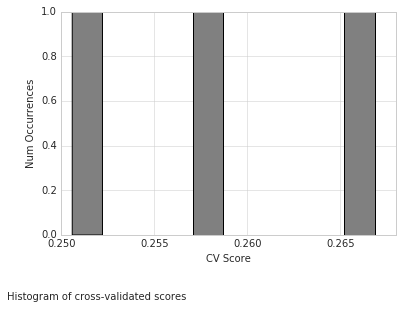

In [26]:
prd = RatingsFactorizer() | pd_ensemble.RandomForestRegressor()
hist(
    pd_model_selection.cross_val_score(prd, ratings[features], ratings.rating),
    color='grey');
xlabel('CV Score')
ylabel('Num Occurrences')
figtext(
    0, 
    -0.1, 
    'Histogram of cross-validated scores');

The CV histogram indicates that the results are now positive.